In [11]:
import pandas as pd
ufo_doc= "Resources/scrubbed.csv"
import matplotlib.pyplot as plt


In [2]:
ufo_df = pd.read_csv(ufo_doc, encoding="ISO-8859-1")
ufo_df.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [3]:
#list(ufo_df.columns.values
#ufo_df = ufo_df.datetime.str.split(" ",expand=True,)
#ufo_df
#ufo_df = ufo_df['datetime'].apply(lambda x: pd.Series(x.split(' ')))
#ufo_df.head()

In [4]:
ufo_us_df = ufo_df[['state',"country","datetime"]]
ufo_us_df.head()

#get rid of nans
ufo_us_df = ufo_us_df.dropna(how='any')
# US only data
ufo_us_df = ufo_us_df[ufo_us_df['country']=="us"]
#new_df = pd.to_datetime(ufo_us_df)
#new_df.head()
ufo_us_df.head()
 
df_season = ufo_us_df['datetime'].apply(lambda x: pd.Series(x.split('/')))
#df_season.head()
df_time = df_season[2].apply(lambda x: pd.Series(x.split(' ')))
df_time.head()



,0,1
0,1949,20:30
3,1956,21:00
4,1960,20:00
5,1961,19:00
7,1965,23:45


In [5]:
df_timeofday = df_time[1].apply(lambda x: pd.Series(x.split(':')))
df_timeofday.head()

,0,1
0,20,30
3,21,00
4,20,00
5,19,00
7,23,45


In [6]:
df_timeofday[0] = df_timeofday[0].astype(int)

In [7]:
bins = [0,6,12,18,24]
labels = ["Dawn","Morning","Afternoon","Night"]
df_timeofday["time"] = pd.cut(df_timeofday[0], bins=bins, labels=labels)


In [8]:
df_timeofday.head()

,0,1,time
0,20,30,Night
3,21,00,Night
4,20,00,Night
5,19,00,Night
7,23,45,Night


In [9]:
timeofday_1 = df_timeofday.groupby("time").agg({"time":"count"})


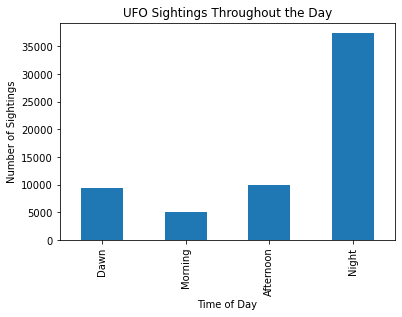

In [20]:
timeofday_1["time"].plot(kind="bar")
plt.xlabel('Time of Day')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings Throughout the Day')
plt.savefig('Resources/Presentation/sightings_by_timeperiod.PNG')

In [14]:
df_season[0] = df_season[0].astype(int)

In [15]:
#new_df.groupby(0).count()[2]

bins = [0,3,6,9,12]
labels = ["Winter","Spring","Summer","Fall"]
df_season['binned'] = pd.cut(df_season[0], bins=bins, labels=labels)


In [16]:
#new_df.head()
df = df_season.groupby("binned").agg({"binned":"count"})
#max sightings
df.head()

,binned
binned,
Winter,12842
Spring,15123
Summer,20646
Fall,16503


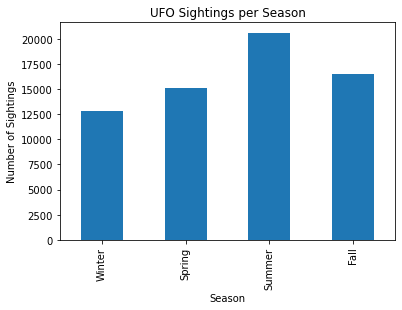

In [19]:
# Individual columns chosen from the DataFrame
# as Series are plotted in the same way:
df['binned'].plot(kind="bar")
plt.xlabel('Season')
plt.ylabel('Number of Sightings')
plt.title('UFO Sightings per Season')
plt.savefig('Resources/Presentation/sightings_per_season.PNG')

In [26]:
ufo_us_df = ufo_us_df['datetime'].apply(lambda x: pd.Series(x.split(' ')))
ufo_us_df.head()


,0,1
0,10/10/1949,20:30
3,10/10/1956,21:00
4,10/10/1960,20:00
5,10/10/1961,19:00
7,10/10/1965,23:45


In [35]:
ufo_us_df.count()

city          65114
state         65114
country       65114
latitude      65114
longitude     65114
dtype: int64

In [40]:
# load the census population by city data
census = "Resources/sub-est2019_all.csv"
census_df = pd.read_csv(census, encoding="ISO-8859-1")
census_df.head()

,SUMLEV,STATE,COUNTY,PLACE,COUSUB,CONCIT,PRIMGEO_FLAG,FUNCSTAT,NAME,STNAME,...,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,POPESTIMATE2018,POPESTIMATE2019
0,40,1,0,0,0,0,0,A,Alabama,Alabama,...,4785437,4799069,4815588,4830081,4841799,4852347,4863525,4874486,4887681,4903185
1,162,1,0,124,0,0,0,A,Abbeville city,Alabama,...,2699,2694,2643,2628,2608,2600,2584,2575,2571,2560
2,162,1,0,460,0,0,0,A,Adamsville city,Alabama,...,4500,4493,4471,4449,4420,4390,4356,4327,4308,4281
3,162,1,0,484,0,0,0,A,Addison town,Alabama,...,751,750,743,742,739,734,731,726,723,718
4,162,1,0,676,0,0,0,A,Akron town,Alabama,...,355,347,347,343,338,339,333,332,331,328


In [44]:
# narrow down to the city, state and population from 2019
pop_raw_df = census_df[["NAME","STNAME","POPESTIMATE2019"]]

# rename the columns
pop_df = pop_raw_df.rename(columns = {'NAME':'city', 'STNAME':'state','POPESTIMATE2019':'population'})
pop_df.head()


,city,state,population
0,Alabama,Alabama,4903185
1,Abbeville city,Alabama,2560
2,Adamsville city,Alabama,4281
3,Addison town,Alabama,718
4,Akron town,Alabama,328


In [61]:
# This removes the overall state populations and only includes the city, town, and village
pop1_df = pop_df.copy()
pop2_df = pop1_df[pop1_df['city'].str.contains('city|town|village', case=False)]

# need to translate state abbrev and state name to merge the data



In [60]:
#play with Ohio data
ohio_df = pop2_df[pop2_df['state']=="Ohio"]

ufo_oh_df = ufo_us_df[ufo_us_df['state']=="oh"]
#ufo_oh_df.head()
ohio_df.count()



city          5418
state         5418
population    5418
dtype: int64

In [62]:
us_states = "Resources/state_abbrev.csv"
states_df = pd.read_csv(us_states, encoding="ISO-8859-1")
states_df.head()

,state,abbrev
0,Alabama,al
1,Alaska,ak
2,Arizona,az
3,Arkansas,ar
4,California,ca
